In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing the dataset
df = pd.read_csv('data.csv')
df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710000,8,2.00,NaN,NaN


### As we can see, the data has structuring issues from row 761, therefore we'll have to restructure the data

In [3]:
#splitting the dataset to two dataframes, df2 with missing values
df1 = df[0:761]
df2 = df[761:]
# restructure the dataset by shifting the columns to match between df1 and df2
c = list(df2)
for x in range(12):
    c[x+1] = c[x+3]
    
df2.columns = c
# further restructuring
df2 = df2.iloc[:, :-2]
df2.rename(columns={'campaign_id': 'reporting_start','fb_campaign_id': 'reporting_end'}, inplace=True)

df2.insert(3, 'campaign_id',np.NaN)
df2.insert(4,'fb_campaign_id',np.NaN)

In [4]:
df2.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
761,1121594,26/08/2017,26/08/2017,NaN,NaN,45-49,M,10,14,14,426500,72,128.279999,4,1.0
762,1121597,30/08/2017,30/08/2017,NaN,NaN,45-49,M,15,21,19,54237,7,10.780000,2,1.0
763,1121598,30/08/2017,30/08/2017,NaN,NaN,45-49,M,15,19,18,506916,89,133.699999,2,2.0
764,1121599,30/08/2017,30/08/2017,NaN,NaN,45-49,M,15,17,18,250960,42,64.880000,2,0.0
765,1121601,30/08/2017,30/08/2017,NaN,NaN,45-49,M,16,20,18,2286228,353,603.380002,16,7.0


In [5]:
# appending to get final dataframe
df = df1.append(df2, ignore_index=True)
df.head() 

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          761 non-null    object 
 4   fb_campaign_id       761 non-null    object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   object 
 8   interest2            1143 non-null   object 
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     1143 non-null   float64
 14  approved_conversion  1143 non-null   float64
dtypes: float64(4), int64(3), object(8)
mem

### VISUALIZATION AND DATA ANALYSIS

In [7]:
df.gender.value_counts()

M    592
F    551
Name: gender, dtype: int64

In [8]:
df.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

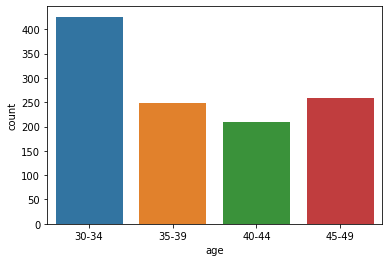

In [9]:
sns.countplot(df.age);

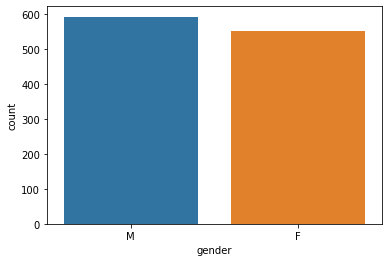

In [10]:
sns.countplot(df.gender)

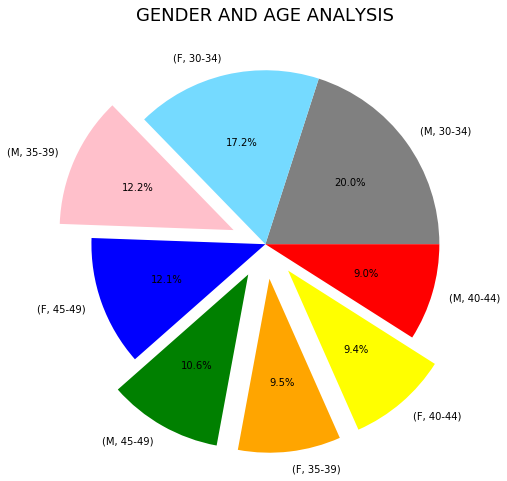

In [11]:
colors = ['grey','#75daff','pink','blue','green','orange','yellow','red']
df[['gender','age']].value_counts().plot.pie(explode=[0,0,0.2,0,0.2,0.2,0.2,0],autopct='%1.1f%%',colors=colors, figsize = (8,8))
plt.ylabel('')
plt.title('GENDER AND AGE ANALYSIS',fontstyle='normal', fontsize=18);

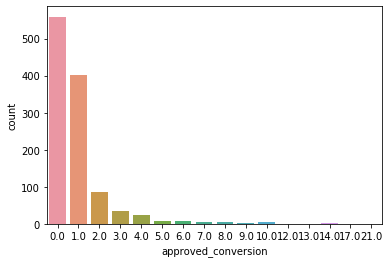

In [12]:
sns.countplot(df.approved_conversion);

In [13]:
# checking to determine the correlation
corrmat = df.corr()
corrmat

,ad_id,interest3,impressions,clicks,spent,total_conversion,approved_conversion
ad_id,1.000000,0.455100,0.462308,0.431981,0.433053,0.346539,0.271331
interest3,0.455100,1.000000,0.102056,0.088928,0.070409,0.120662,0.058622
impressions,0.462308,0.102056,1.000000,0.948514,0.970386,0.812838,0.684249
clicks,0.431981,0.088928,0.948514,1.000000,0.992906,0.694632,0.559526
spent,0.433053,0.070409,0.970386,0.992906,1.000000,0.725379,0.593178
total_conversion,0.346539,0.120662,0.812838,0.694632,0.725379,1.000000,0.864034
approved_conversion,0.271331,0.058622,0.684249,0.559526,0.593178,0.864034,1.000000


In [14]:
corrmat.shape

(7, 7)

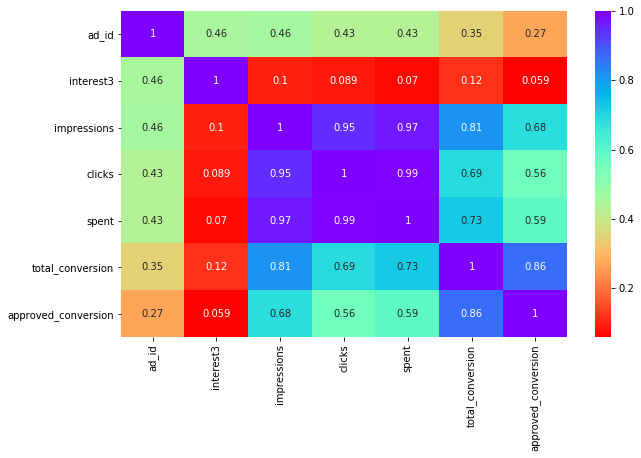

In [15]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corrmat, annot=True, cmap='rainbow_r');

In [16]:
corrmat.index

Index(['ad_id', 'interest3', 'impressions', 'clicks', 'spent',
       'total_conversion', 'approved_conversion'],
      dtype='object')

In [17]:
# creating a function to get the correlated features

def get_correlated_feature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    
    dh = pd.DataFrame(data=value, index=feature, columns=['corr_value'])
    return dh

In [18]:
threshold = 0.5
corr_df = get_correlated_feature(corrmat['approved_conversion'],threshold)

In [19]:
corr_df

,corr_value
impressions,0.684249
clicks,0.559526
spent,0.593178
total_conversion,0.864034
approved_conversion,1.000000


In [20]:
correlated_data = df[corr_df.index]
correlated_data.head()

,impressions,clicks,spent,total_conversion,approved_conversion
0,7350.0,1,1.43,2.0,1.0
1,17861.0,2,1.82,2.0,0.0
2,693.0,0,0.00,1.0,0.0
3,4259.0,1,1.25,1.0,0.0
4,4133.0,1,1.29,1.0,1.0


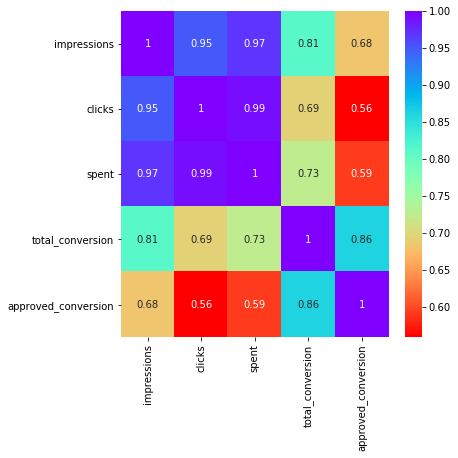

In [21]:
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(correlated_data.corr(), annot=True, cmap='rainbow_r');

### FEATURE ENGINEERING

In [22]:
df.drop(['reporting_start','reporting_end'],inplace=True,axis=1)

In [23]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['gender'] = lb.fit_transform(df['gender']) # label encode gender

In [24]:
# changing these variables to the proper format of an integer
df['total_conversion'] = df['total_conversion'].astype(int)
df['approved_conversion'] = df['approved_conversion'].astype(int)
df['impressions'] = df['impressions'].astype(int)

In [25]:
# get dummies for age
df = pd.concat([df,pd.get_dummies(df['age'],prefix='age')],axis=1)
df.drop('age',inplace=True,axis=1)

In [26]:
# The dataframe should look good now. 
df.head()

,ad_id,campaign_id,fb_campaign_id,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,age_30-34,age_35-39,age_40-44,age_45-49
0,708746,916,103916,1,15,17,17,7350,1,1.43,2,1,1,0,0,0
1,708749,916,103917,1,16,19,21,17861,2,1.82,2,0,1,0,0,0
2,708771,916,103920,1,20,25,22,693,0,0.00,1,0,1,0,0,0
3,708815,916,103928,1,28,32,32,4259,1,1.25,1,0,1,0,0,0
4,708818,916,103928,1,28,33,32,4133,1,1.29,1,1,1,0,0,0


In [27]:
df.isna().sum()

ad_id                    0
campaign_id            382
fb_campaign_id         382
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion         0
approved_conversion      0
age_30-34                0
age_35-39                0
age_40-44                0
age_45-49                0
dtype: int64

In [28]:
# Working on the missing data
# imputation of missing values
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
X = pd.DataFrame(KNN(k=3).fit_transform(df))
X.columns = df.columns
X.index = df.index

Imputing row 1/1143 with 0 missing, elapsed time: 0.578
Imputing row 101/1143 with 0 missing, elapsed time: 0.578
Imputing row 201/1143 with 0 missing, elapsed time: 0.578
Imputing row 301/1143 with 0 missing, elapsed time: 0.578
Imputing row 401/1143 with 0 missing, elapsed time: 0.578
Imputing row 501/1143 with 0 missing, elapsed time: 0.578
Imputing row 601/1143 with 0 missing, elapsed time: 0.578
Imputing row 701/1143 with 0 missing, elapsed time: 0.578
Imputing row 801/1143 with 2 missing, elapsed time: 0.578
Imputing row 901/1143 with 2 missing, elapsed time: 0.594
Imputing row 1001/1143 with 2 missing, elapsed time: 0.609
Imputing row 1101/1143 with 2 missing, elapsed time: 0.609


In [29]:
X.isna().sum()

ad_id                  0
campaign_id            0
fb_campaign_id         0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
age_30-34              0
age_35-39              0
age_40-44              0
age_45-49              0
dtype: int64

In [30]:
X['campaign_id'] = X['campaign_id'].astype(int)
X['fb_campaign_id'] = X['fb_campaign_id'].astype(int)
X['campaign_id'] = X['campaign_id'].replace(1177,1178) 

### MODELLING

In [31]:
df = X.copy()

df.spent=df.spent.astype(int)
df.interest1=df.interest1.astype(int)
df.interest2=df.interest2.astype(int)
df.interest3=df.interest3.astype(int)
df.campaign_id=df.campaign_id.astype('category')

In [32]:
df.dtypes

ad_id                   float64
campaign_id            category
fb_campaign_id            int32
gender                  float64
interest1                 int32
interest2                 int32
interest3                 int32
impressions             float64
clicks                  float64
spent                     int32
total_conversion        float64
approved_conversion     float64
age_30-34               float64
age_35-39               float64
age_40-44               float64
age_45-49               float64
dtype: object

In [33]:
df['approved_conversion'] = df['approved_conversion'].replace([range(2,22)], 1)

df.approved_conversion=df.approved_conversion.astype('category')
df['approved_conversion'].value_counts()

# to have class balance. 

1.0    584
0.0    559
Name: approved_conversion, dtype: int64

In [34]:
from sklearn.metrics import  classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [35]:
# Taking the log of the continious variables to mitigate kurtosis and skewdness as much as possible

col= [['interest1','interest2','interest3']]
for cols in col:
    df[cols] = np.log(df[cols])
    df[cols] = np.log(df[cols])

In [36]:
x = df[[ 'campaign_id','interest1','interest2','interest3','gender','age_30-34','age_35-39','age_40-44','age_45-49']]
y = df['approved_conversion']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


logmodel = LogisticRegression()
logmodel= RFE(logmodel, 9)
logmodel.fit(X_train,y_train)

C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFE(estimator=LogisticRegression(), n_features_to_select=9)

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61       168
         1.0       0.63      0.65      0.64       175

    accuracy                           0.62       343
   macro avg       0.62      0.62      0.62       343
weighted avg       0.62      0.62      0.62       343



In [40]:
print(logmodel.ranking_) ## For RFE 

[1 1 1 1 1 1 1 1 1]


In [41]:
print(logmodel.support_) ## For RFE

[ True  True  True  True  True  True  True  True  True]


### Tuning the hyperparameters using Randomized Search Cv to try to improve the Model 

In [42]:
# Setting up the grid parameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

from sklearn.model_selection import RandomizedSearchCV

In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [44]:
# checking the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [45]:
rs_log_reg.score(X_test, y_test)

0.6239067055393586

#### It seems the Model didn't improve further after tuning the hyperparameters. Therefore there are no changes.

## Add-bidding Model (Testing the Model)

In [46]:
X_test[:10]  # Here is the testing data that the model hasn't seen before. 

,campaign_id,interest1,interest2,interest3,gender,age_30-34,age_35-39,age_40-44,age_45-49
158,936,1.425247,1.439718,1.428968,1.0,1.0,0.0,0.0,0.0
1081,1178,1.531470,1.541765,1.533578,1.0,0.0,0.0,0.0,1.0
291,936,1.061385,1.142787,1.156269,1.0,1.0,0.0,0.0,0.0
538,1178,1.079918,1.156269,1.169032,1.0,1.0,0.0,0.0,0.0
367,936,1.061385,1.156269,1.128508,0.0,0.0,0.0,0.0,1.0
793,1178,1.192660,1.251765,1.224128,1.0,0.0,0.0,0.0,1.0
128,936,1.214110,1.251765,1.251765,1.0,0.0,0.0,0.0,1.0
56,936,0.996229,1.079918,1.041412,1.0,1.0,0.0,0.0,0.0
448,936,1.276345,1.311994,1.305323,1.0,0.0,0.0,1.0,0.0
422,936,1.192660,1.251765,1.224128,0.0,0.0,0.0,1.0,0.0


In [47]:
# model's prediction for the first 10 rows of test data
logmodel.predict(X_test[:10])

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0.])

In [48]:
#Prediction for the first row
X1 = X_test[:1]
X1
logmodel.predict(X1)

array([0.])

In [49]:
# prediction when the campaign_id is changed to 916
X1['campaign_id'] = X1['campaign_id'].replace(936, 916)
logmodel.predict(X1)

C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0.])

In [50]:
#prediction to when the campaign id is change to 1178
X1['campaign_id'] = X1['campaign_id'].replace(916, 1178)
logmodel.predict(X1)

C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1.])

### Given any input vector, we can change the campaign_id variable to see which campaign would end up in a conversion according to the model.